In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from experta import *

In [32]:
# Load the heart disease dataset
file_path = "d:/Semester Four/Intelligent Programming/Project 1/heart.csv"  
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1.0,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0.0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1.0,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1.0,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1.0,106,0,1.9,1,3,2,0


In [33]:
# Check for missing values
data.isnull().sum()

# Fill missing values in each column with the column's own mean or median
# Example using mean:
data_filled_mean = data.fillna(data.mean())

# Example using median:
data_filled_median = data.fillna(data.median())

# Verify if missing values are handled
data_filled_mean.isnull().sum()
data_filled_median.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [34]:
from sklearn.preprocessing import MinMaxScaler

# حدد الأعمدة الرقمية اللي محتاجة Normalization
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# إنشاء نسخة من الداتا بعد ملء القيم المفقودة
data_normalized = data_filled_mean.copy()

# إنشاء الـ MinMaxScaler
scaler = MinMaxScaler()

# تطبيق الـ normalization على الأعمدة الرقمية فقط
data_normalized[numerical_columns] = scaler.fit_transform(data_filled_mean[numerical_columns])

# عرض أول 5 صفوف للتأكد
data_normalized.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1,0,0.292453,0.196347,0,1.0,0.740458,0,0.161290,2,2,3,0
1,0.500000,1,0,0.433962,0.175799,1,0.0,0.641221,1,0.500000,0,0,3,0
2,0.854167,1,0,0.481132,0.109589,0,1.0,0.412214,1,0.419355,0,0,3,0
3,0.666667,1,0,0.509434,0.175799,0,1.0,0.687023,0,0.000000,2,1,3,0
4,0.687500,0,0,0.415094,0.383562,1,1.0,0.267176,0,0.306452,1,3,2,0


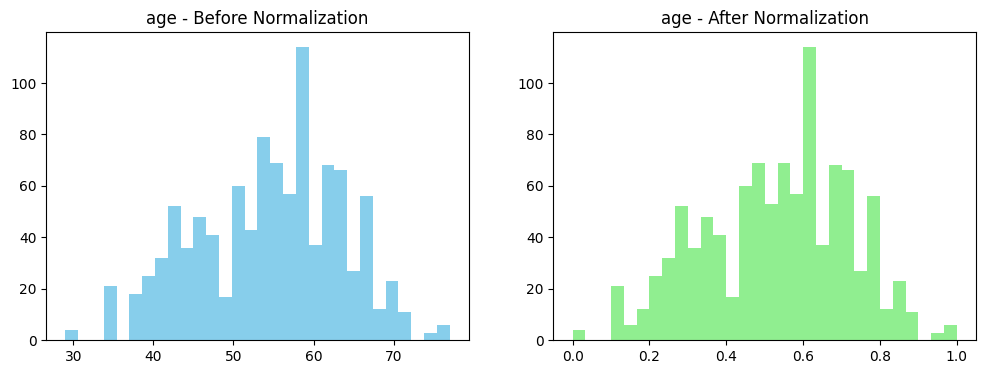

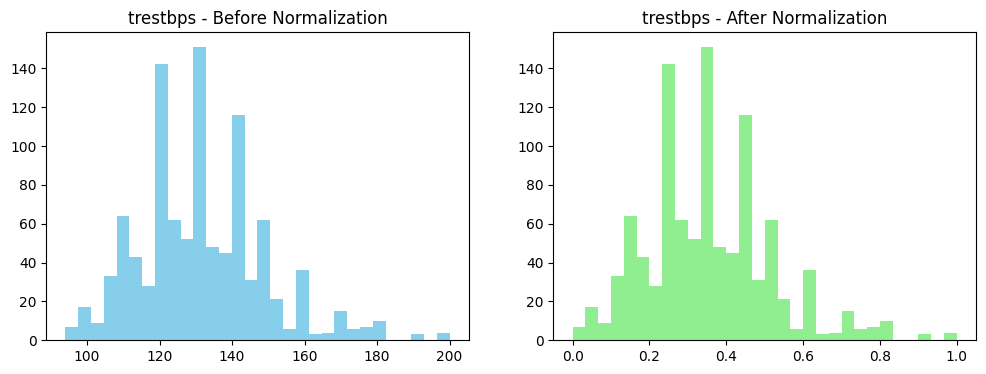

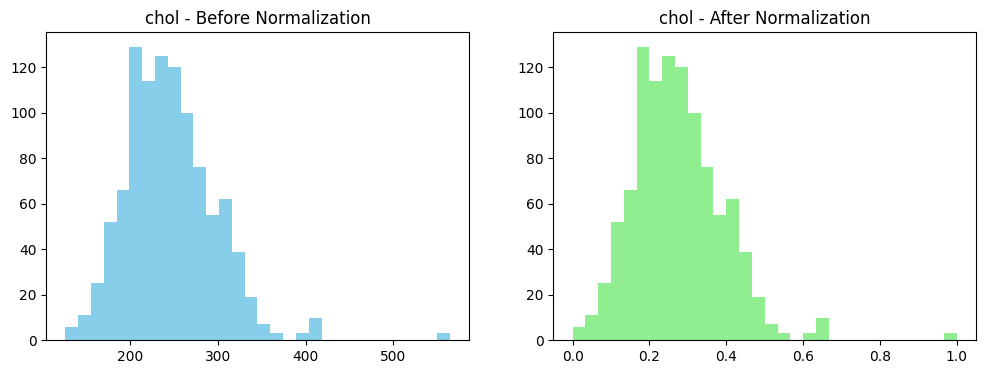

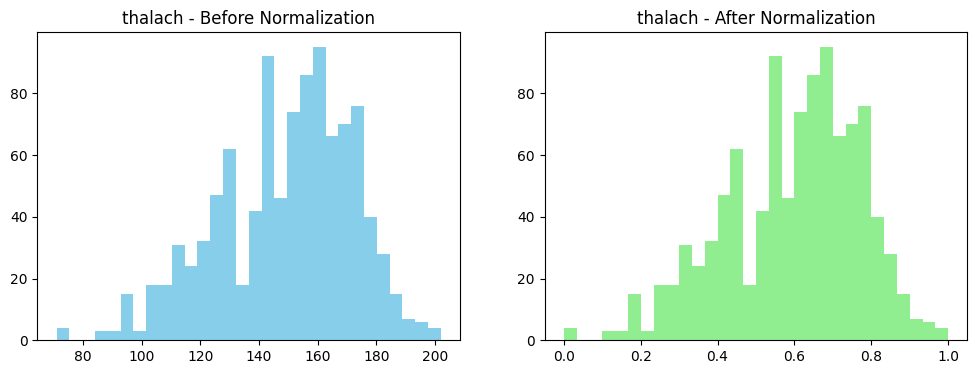

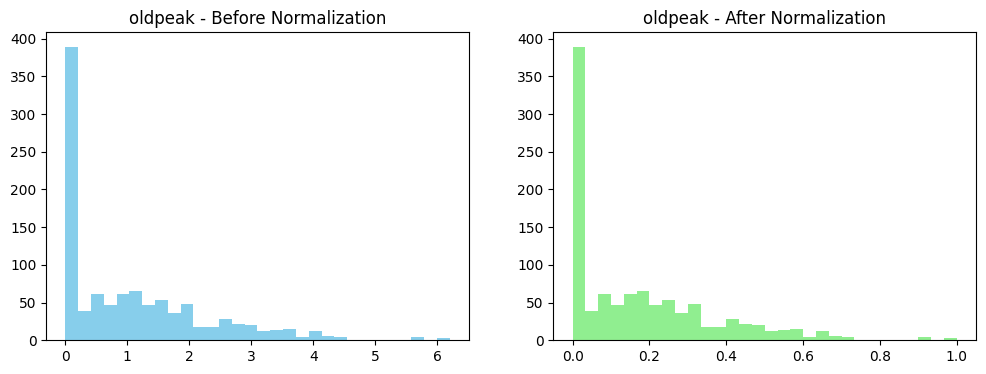

In [35]:
# رسم الأعمدة قبل وبعد التطبيع
for column in numerical_columns:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    ax[0].hist(data_filled_mean[column], bins=30, color='skyblue')
    ax[0].set_title(f"{column} - Before Normalization")
    
    ax[1].hist(data_normalized[column], bins=30, color='lightgreen')
    ax[1].set_title(f"{column} - After Normalization")
    
    plt.show()


In [36]:
# تحديد الأعمدة التصنيفية (حسب dataset بتاعك، غالباً هتكون الأعمدة اللي نوعها object أو int لكنها categorical)
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']  

# التأكد من الأعمدة التصنيفية لو مش متأكد:
# categorical_columns = data_normalized.select_dtypes(include=['object', 'category']).columns.tolist()

# استخدام One-Hot Encoding
data_encoded = pd.get_dummies(data_normalized, columns=categorical_columns, drop_first=True)

# عرض شكل الداتا بعد التشفير
data_encoded.head()


,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.479167,0.292453,0.196347,0.740458,0.161290,0,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,0.500000,0.433962,0.175799,0.641221,0.500000,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,0.854167,0.481132,0.109589,0.412214,0.419355,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.666667,0.509434,0.175799,0.687023,0.000000,0,True,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.687500,0.415094,0.383562,0.267176,0.306452,0,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [37]:
print(f"Number of columns before encoding: {data_normalized.shape[1]}")
print(f"Number of columns after encoding: {data_encoded.shape[1]}")

Number of columns before encoding: 14
Number of columns after encoding: 24


target                 1.000000
thal_2                 0.519543
thalach                0.422895
slope_2                0.389140
cp_2                   0.319504
cp_1                   0.255288
restecg_1.0            0.180576
ca_4                   0.085639
cp_3                   0.085054
restecg_0.529296875   -0.032084
fbs_1                 -0.041164
restecg_2.0           -0.076357
thal_1                -0.095541
chol                  -0.099966
trestbps              -0.138772
ca_3                  -0.205720
age                   -0.229324
ca_1                  -0.235299
ca_2                  -0.276566
sex_1                 -0.279501
slope_1               -0.349417
oldpeak               -0.437861
exang_1               -0.438029
thal_3                -0.479709
Name: target, dtype: float64


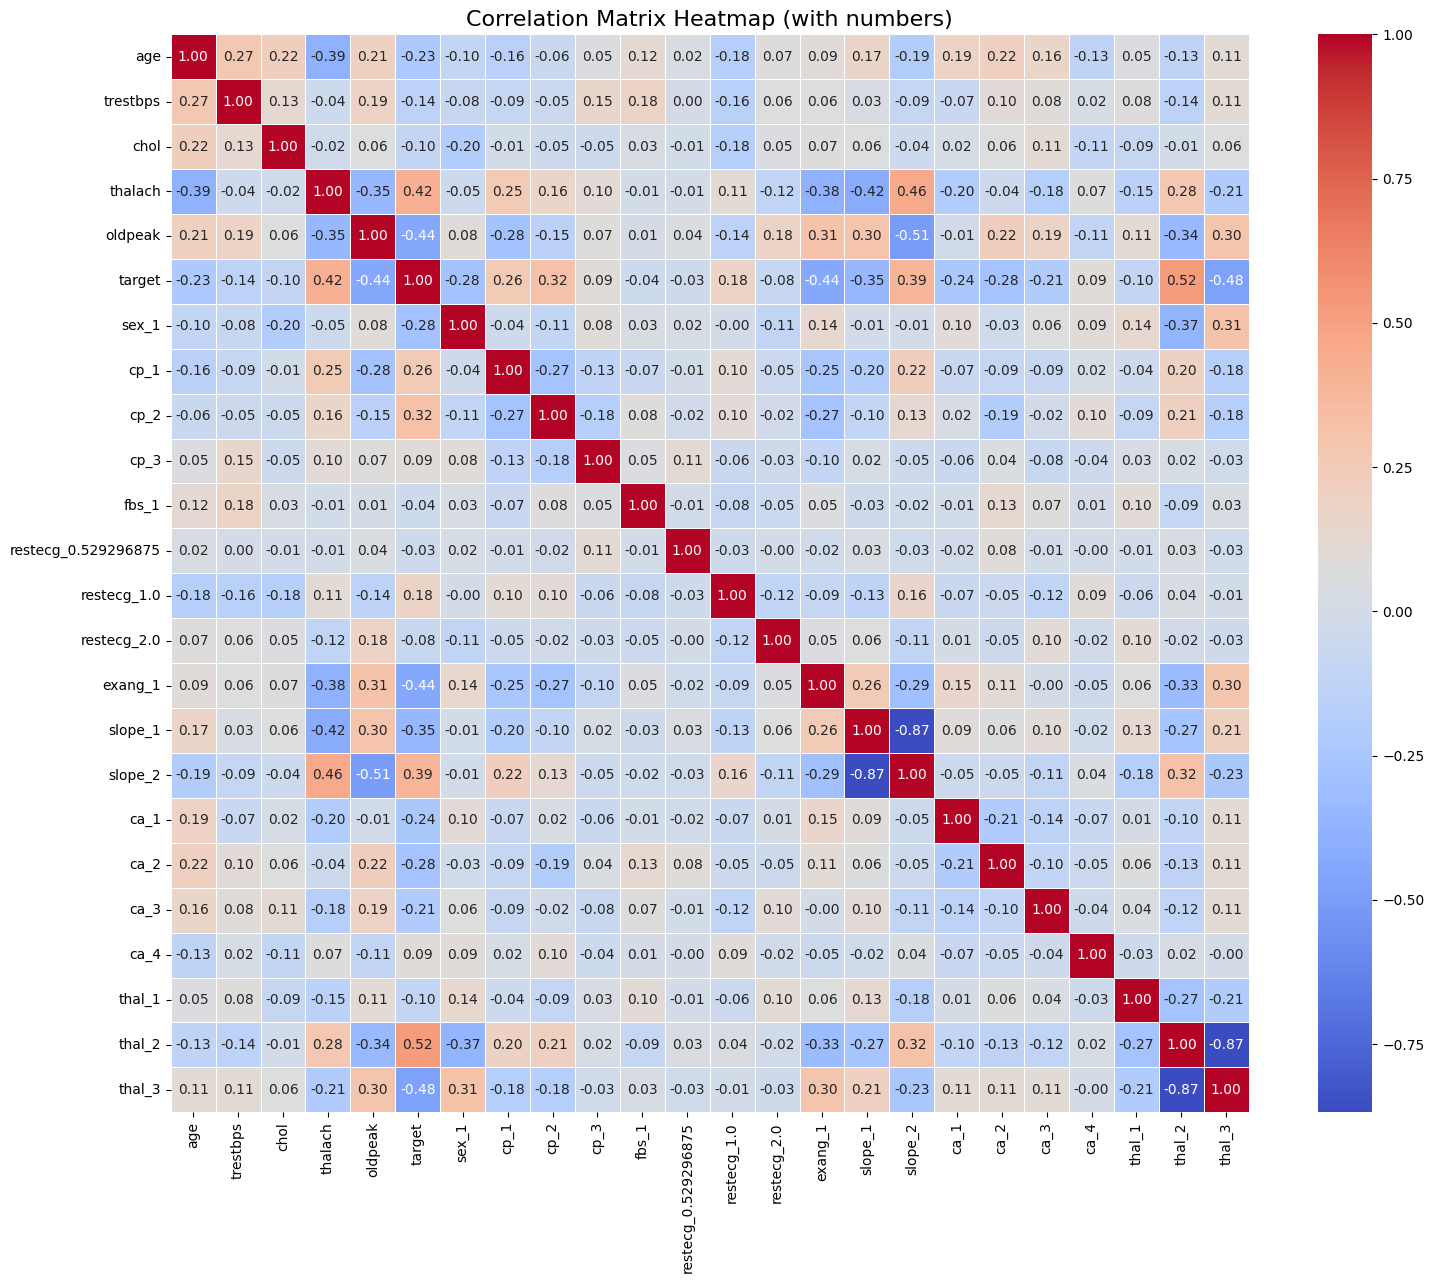

In [38]:
# حساب مصفوفة الارتباط
correlation_matrix = data_encoded.corr()

# نعرض الارتباط بين كل feature وعمود الهدف (بفترض إن target العمود اسمه 'target' - غيّره لو مختلف)
correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)

# عرض القيم
print(correlation_with_target)

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Display the correlation values with a heatmap including the numbers
plt.figure(figsize=(18, 14))  # Bigger size for readability
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap (with numbers)", fontsize=16)
plt.show()


In [39]:
# Select features that have an absolute correlation greater than 0.3 with the target
important_features = correlation_with_target[abs(correlation_with_target) > 0.3].index.tolist()

# Remove the target column itself from the list
important_features.remove('target')

# Display the most important features for prediction
print("Most important features for prediction:")
print(important_features)


Most important features for prediction:
['thal_2', 'thalach', 'slope_2', 'cp_2', 'slope_1', 'oldpeak', 'exang_1', 'thal_3']


In [40]:
# Save the cleaned and processed data to a CSV file
cleaned_data_path = "d:/Semester Four/Intelligent Programming/Project 1/heart_cleaned_data.csv"
data_encoded.to_csv(cleaned_data_path, index=False)

print(f"Cleaned data saved successfully at {cleaned_data_path}")


Cleaned data saved successfully at d:/Semester Four/Intelligent Programming/Project 1/heart_cleaned_data.csv


Step 2: Data Visualization

In [41]:
# Display statistical summary of the cleaned data
data_encoded.describe()


,age,trestbps,chol,thalach,oldpeak,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,0.529878,0.354827,0.273973,0.596291,0.172910,0.513171
std,0.189006,0.165252,0.117791,0.175616,0.189493,0.500070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.245283,0.194064,0.465649,0.000000,0.000000
50%,0.562500,0.339623,0.260274,0.618321,0.129032,1.000000
75%,0.666667,0.433962,0.340183,0.725191,0.290323,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


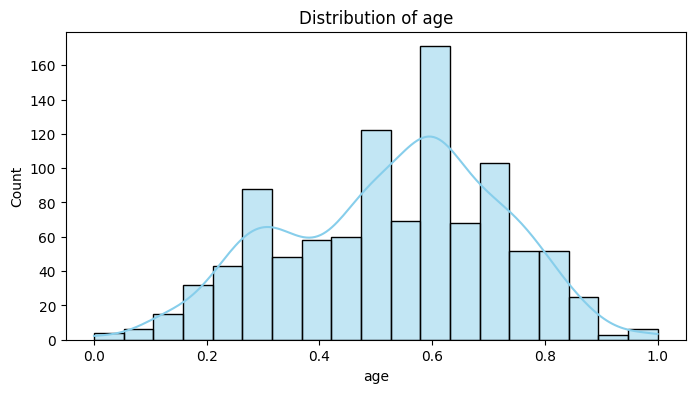

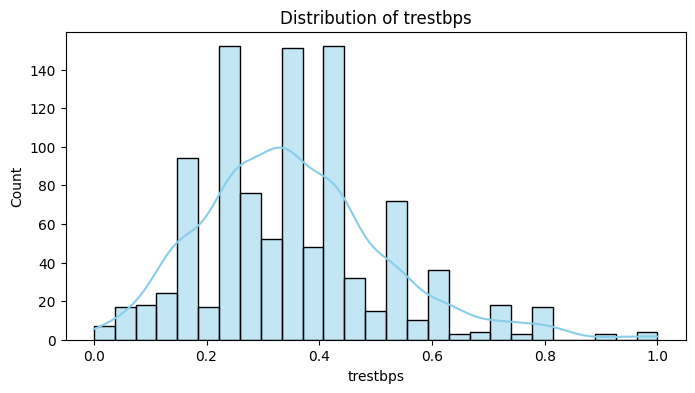

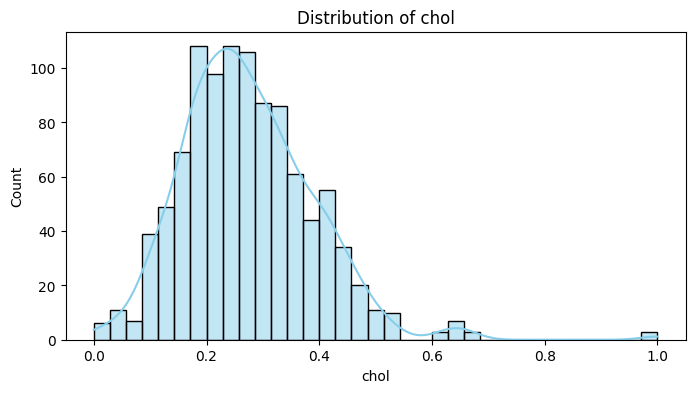

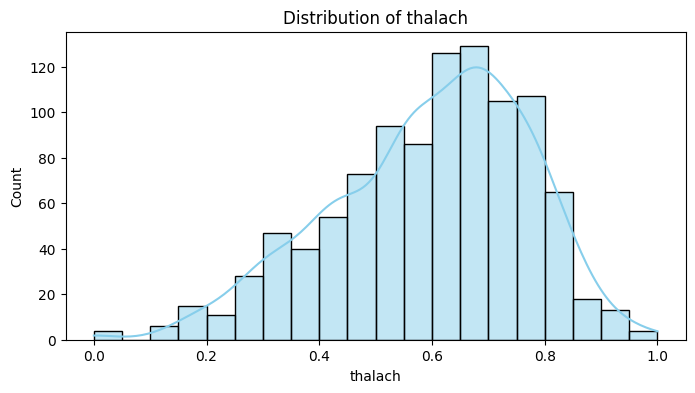

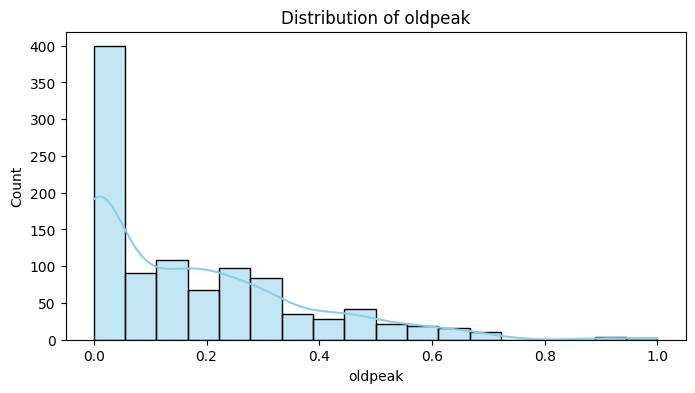

In [42]:
# List of key features you might want to visualize
key_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Plot distributions
for feature in key_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_encoded[feature], kde=True, color='skyblue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()


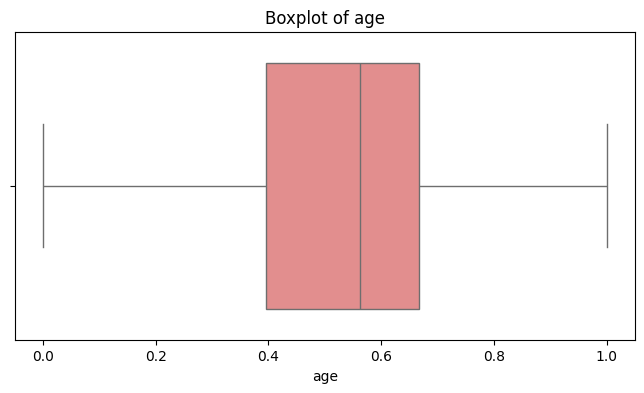

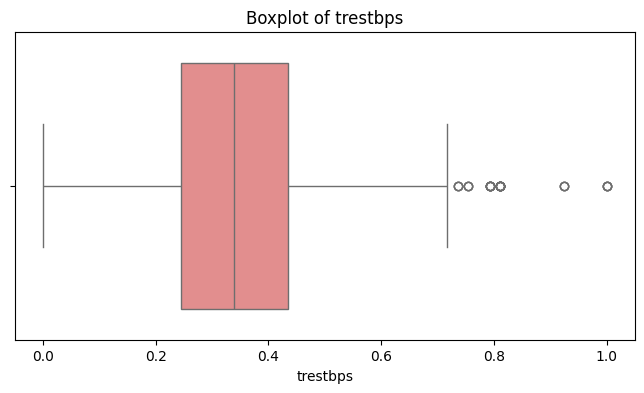

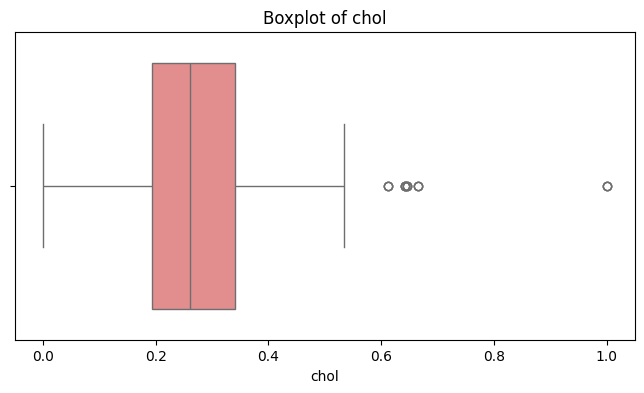

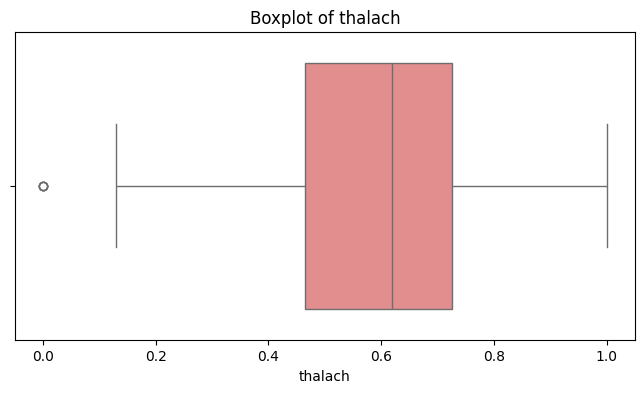

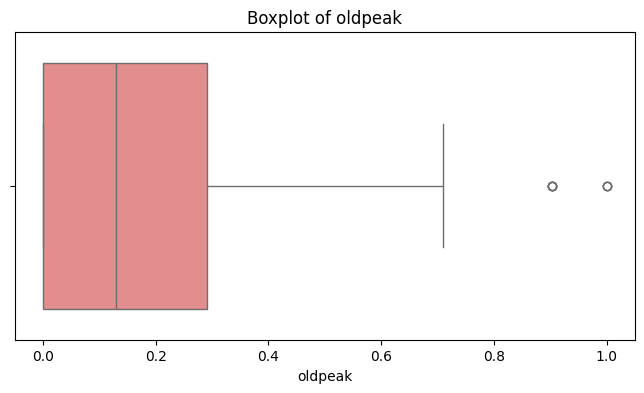

In [43]:
# Boxplots for key features
for feature in key_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data_encoded[feature], color='lightcoral')
    plt.title(f"Boxplot of {feature}")
    plt.show()


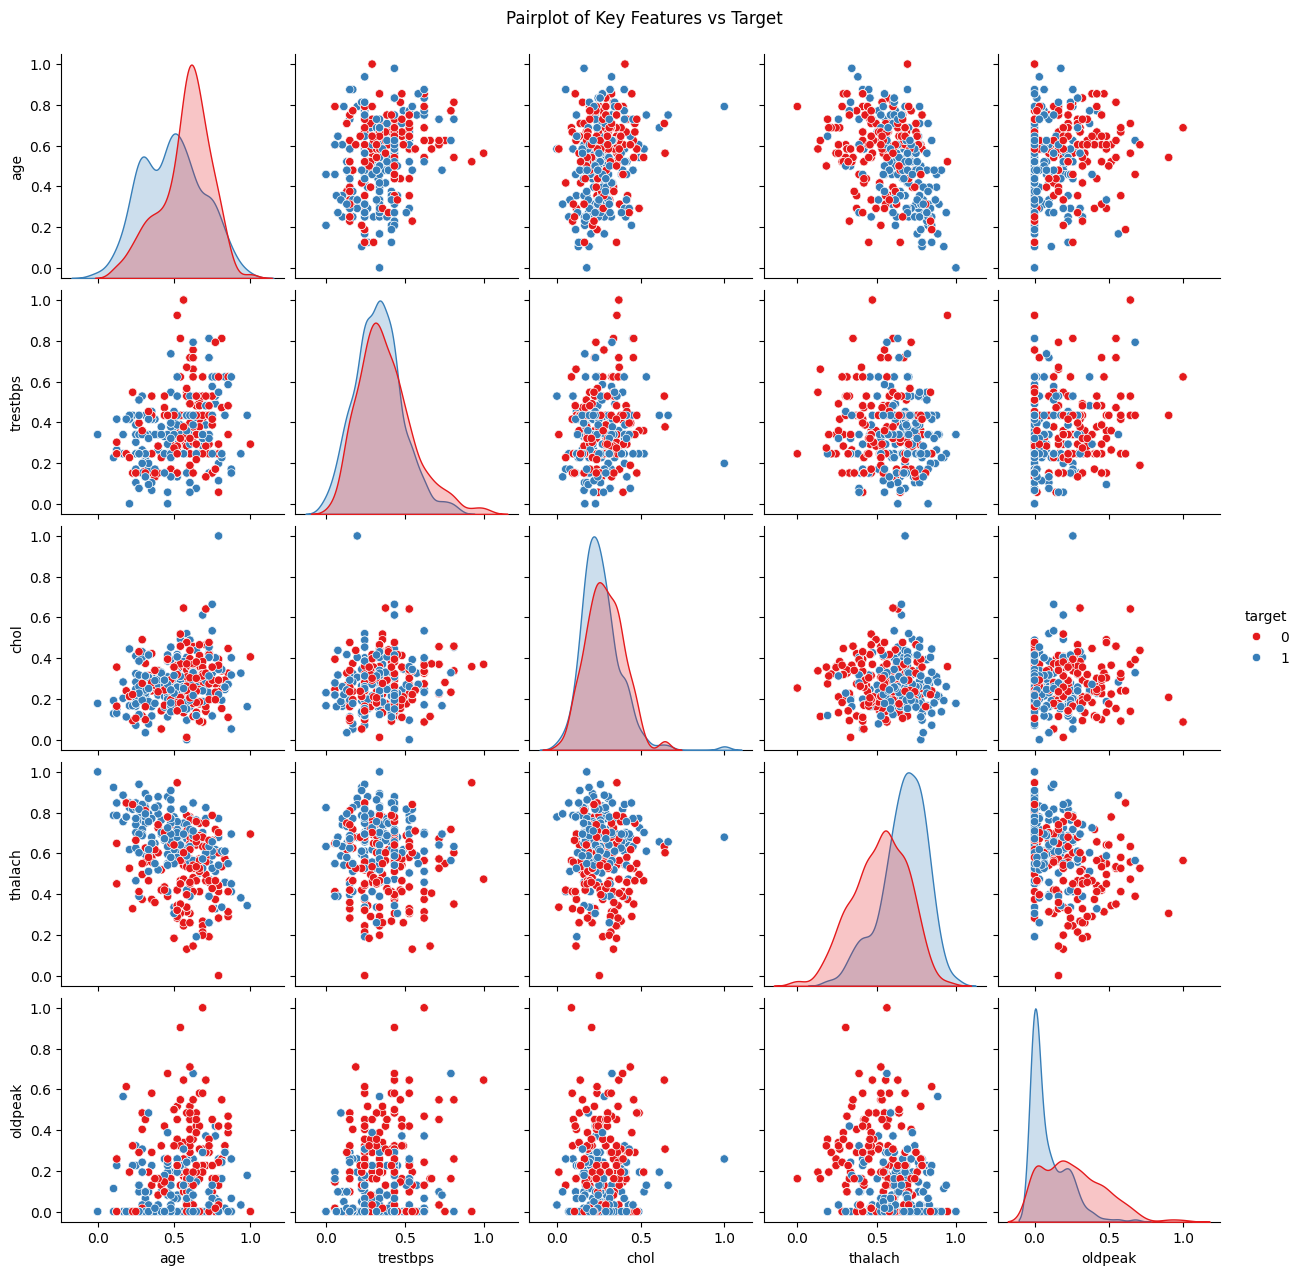

In [44]:
# Select key features + target for pairplot (choose important features)
features_for_pairplot = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']

# Plot pairplot
sns.pairplot(data_encoded[features_for_pairplot], hue='target', palette='Set1', diag_kind='kde')
plt.suptitle("Pairplot of Key Features vs Target", y=1.02)
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14064\1597386020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data_encoded, palette='Set2')


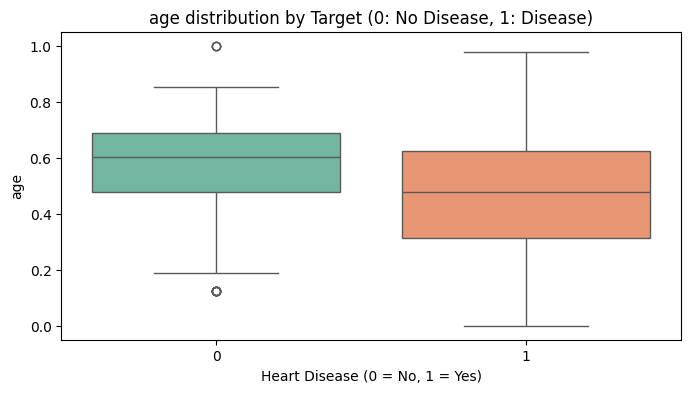

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14064\1597386020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data_encoded, palette='Set2')


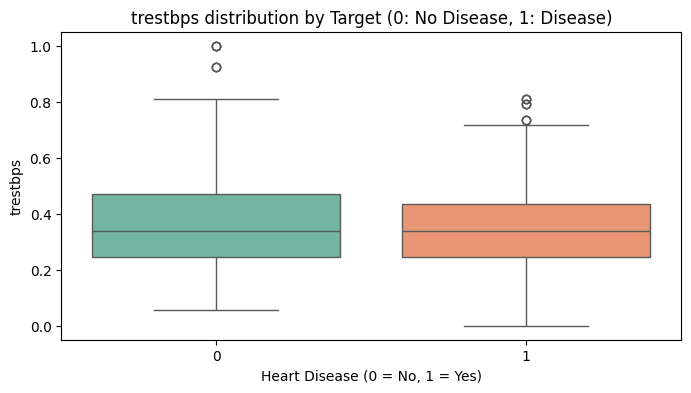

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14064\1597386020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data_encoded, palette='Set2')


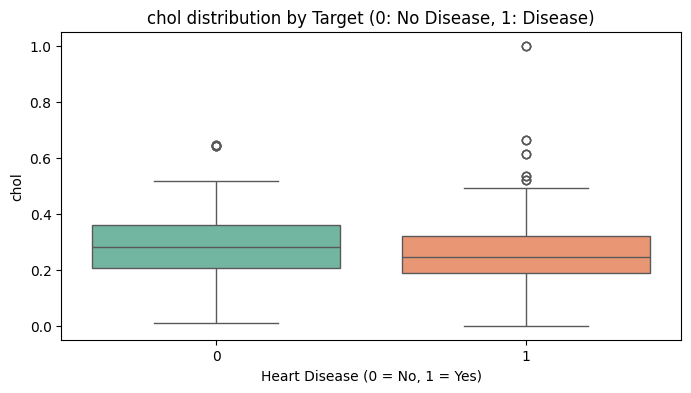

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14064\1597386020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data_encoded, palette='Set2')


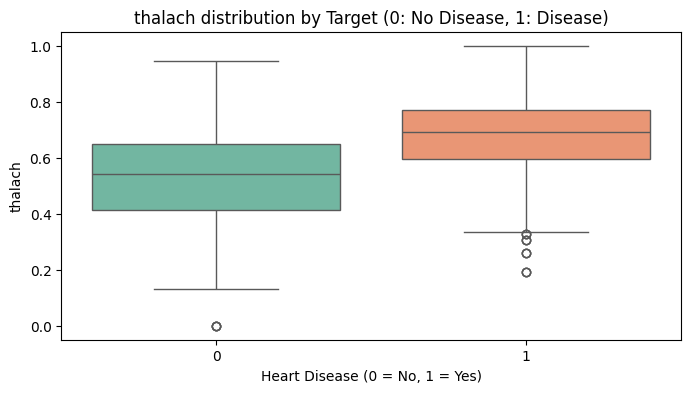

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14064\1597386020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data_encoded, palette='Set2')


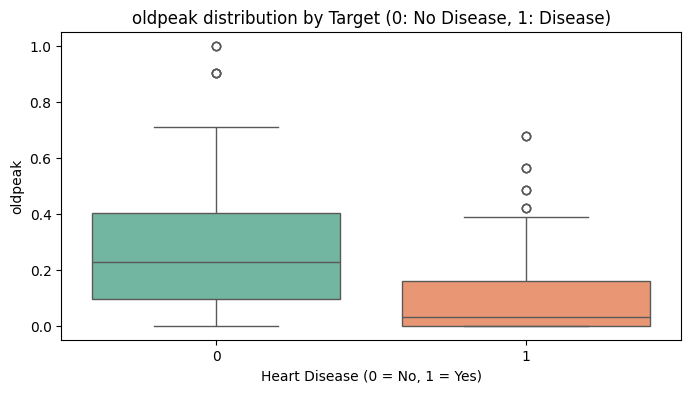

In [45]:
# Plot feature vs target comparison
for feature in key_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='target', y=feature, data=data_encoded, palette='Set2')
    plt.title(f"{feature} distribution by Target (0: No Disease, 1: Disease)")
    plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
    plt.ylabel(feature)
    plt.show()


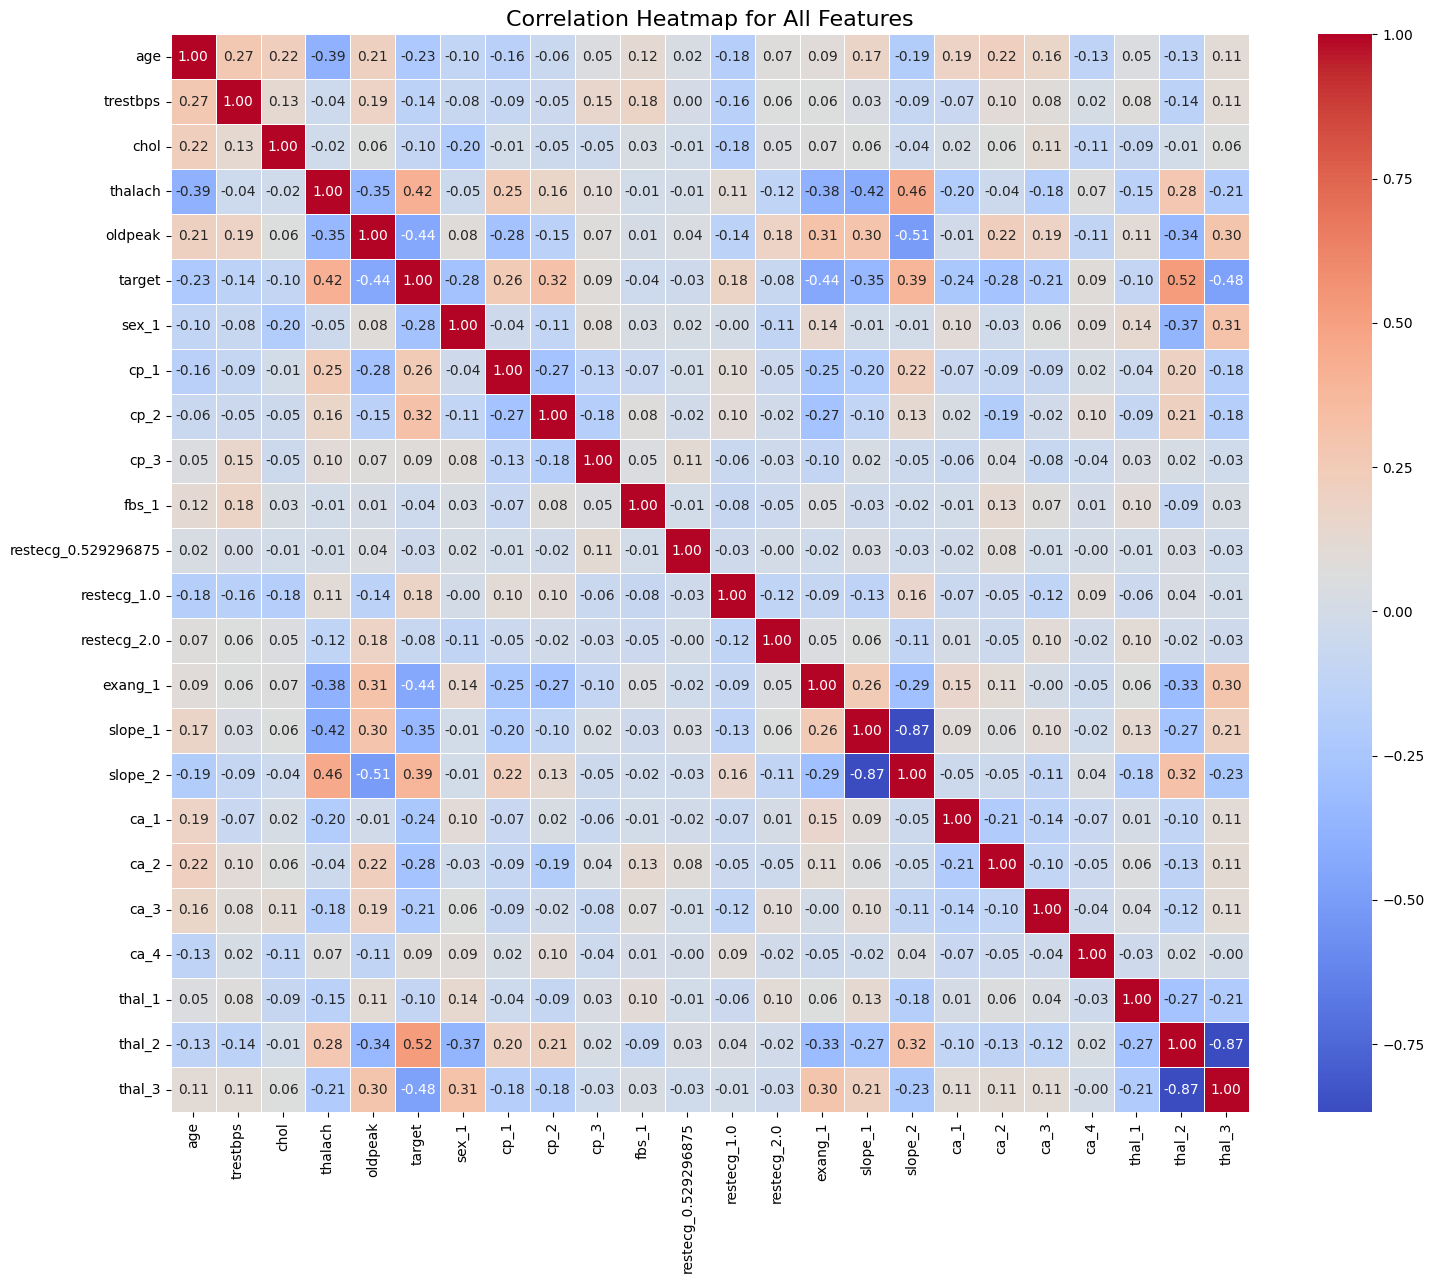

In [46]:
plt.figure(figsize=(18, 14))
sns.heatmap(data_encoded.corr(), cmap='coolwarm', annot=True, fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap for All Features", fontsize=16)
plt.show()


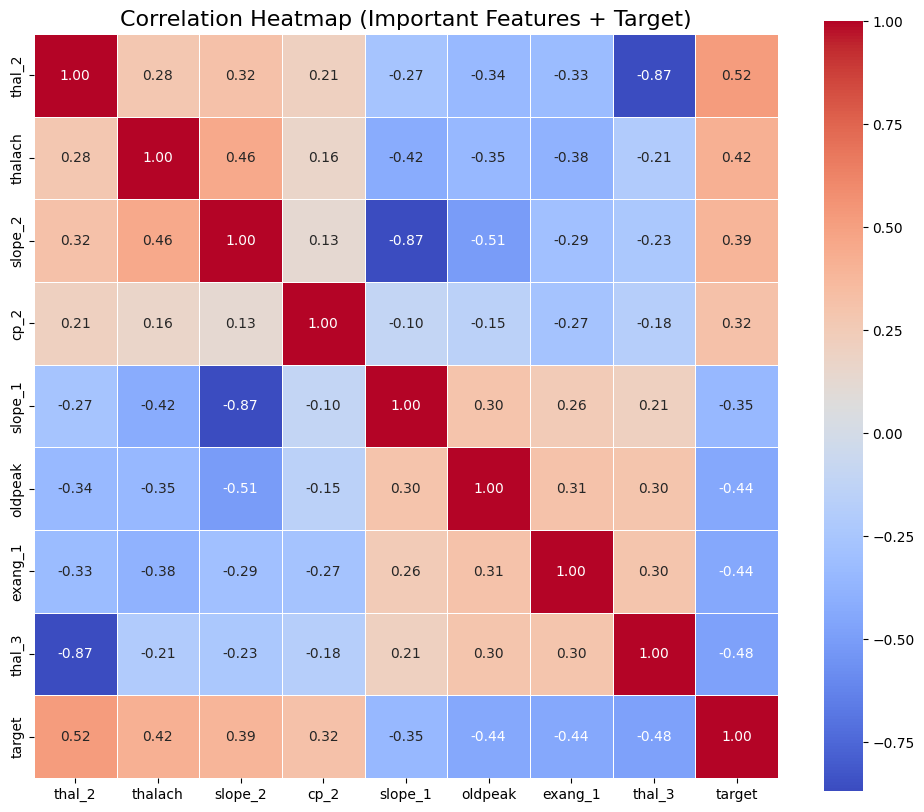

In [47]:
# Correlation for important features only + target
important_features_with_target = important_features + ['target']

plt.figure(figsize=(12, 10))
sns.heatmap(data_encoded[important_features_with_target].corr(), cmap='coolwarm', annot=True, fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap (Important Features + Target)", fontsize=16)
plt.show()


In [48]:
# Separate features and target
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14064\680325343.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')  # Show top 15 features


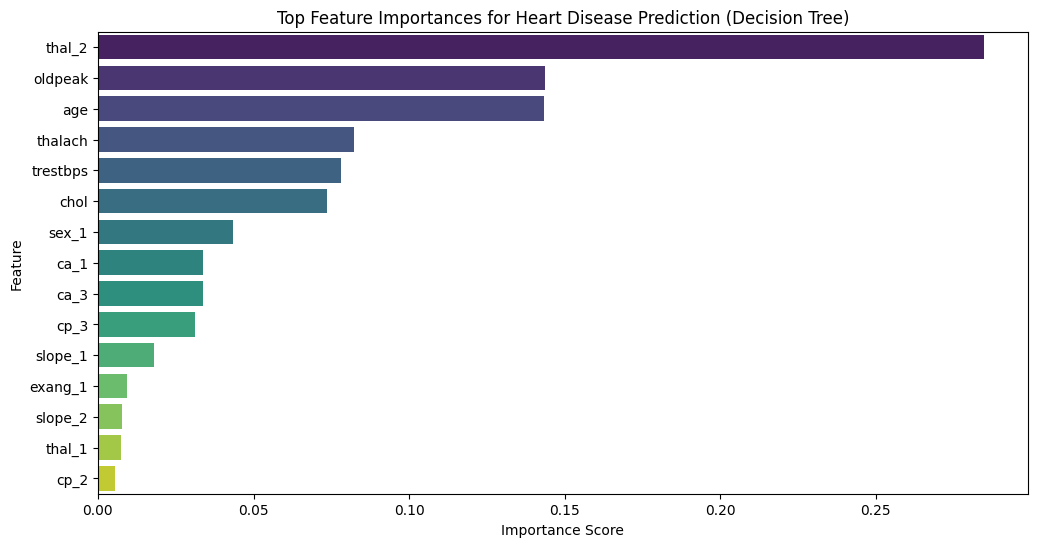

In [49]:
importances = dt_model.feature_importances_
feature_names = X.columns

# Create a DataFrame of features and their importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')  # Show top 15 features
plt.title('Top Feature Importances for Heart Disease Prediction (Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14064\1500770355.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importance_df.head(15), palette='mako')


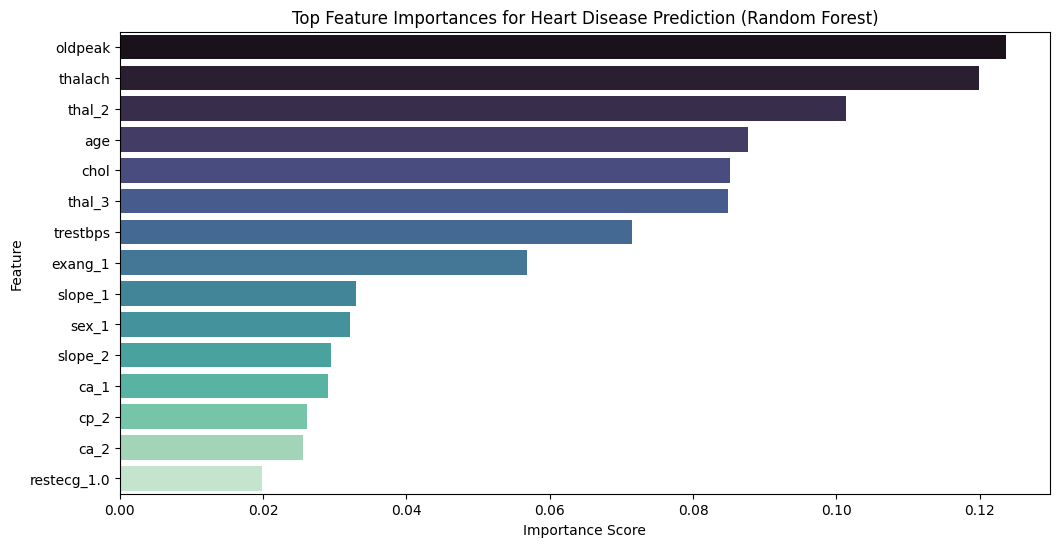

In [50]:

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
rf_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
rf_importance_df = pd.DataFrame({
    'Feature': feature_names,  # Make sure feature_names = X_train.columns.tolist()
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 15 feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df.head(15), palette='mako')
plt.title('Top Feature Importances for Heart Disease Prediction (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
